In [418]:
import numpy as np
import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
%matplotlib inline 

In [419]:
import warnings
warnings.filterwarnings('ignore')

In [420]:
# reading the Excel file into pandas dataframe
Election = pd.read_excel("Election_Data-1.xlsx", sheet_name="Election_Dataset_Two Classes")  

In [421]:
Election

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


In [422]:
Exit_Polls = Election.drop(columns=['Unnamed: 0'])

In [423]:
Exit_Polls

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [424]:
Exit_Polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [425]:
# Are there any duplicates ?
df = Exit_Polls.duplicated()
print('Number of duplicate rows = %d' % (df.sum()))
#df[dups]

Number of duplicate rows = 8


In [426]:
print('Before',Exit_Polls.shape)
Exit_Polls.drop_duplicates(inplace=True) 
print('After',Exit_Polls.shape)

Before (1525, 9)
After (1517, 9)


In [427]:
Exit_Polls[Exit_Polls.isnull().any(axis=1)]
#No Null

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [428]:
(Exit_Polls[["vote","age","economic.cond.national","economic.cond.household","Blair","Hague","Europe"]] == 0).sum()
#No zero

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
dtype: int64

In [429]:
Exit_Polls.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [430]:
Exit_Polls["vote"].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

# Converting all objects to categorical codes

In [431]:
Exit_Polls['gender'] = Exit_Polls['gender'].replace({'male': 1, 'female':2})

In [432]:
Exit_Polls['vote'].value_counts()
#Highly Imbalanced Dataset in favour of Labour Party

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [433]:
Exit_Polls['vote'] = Exit_Polls['vote'].replace({'Labour': 1, 'Conservative':2})

In [434]:
Exit_Polls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1517 non-null int64
age                        1517 non-null int64
economic.cond.national     1517 non-null int64
economic.cond.household    1517 non-null int64
Blair                      1517 non-null int64
Hague                      1517 non-null int64
Europe                     1517 non-null int64
political.knowledge        1517 non-null int64
gender                     1517 non-null int64
dtypes: int64(9)
memory usage: 118.5 KB


# Treating Outliers

In [435]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [436]:
for column in Exit_Polls.columns:
    if Exit_Polls[column].dtype != 'object': 
        lr,ur=remove_outlier(Exit_Polls[column])
        Exit_Polls[column]=np.where(Exit_Polls[column]>ur,ur,Exit_Polls[column])
        Exit_Polls[column]=np.where(Exit_Polls[column]<lr,lr,Exit_Polls[column])

# Univariate Analysis

In [437]:
Exit_Polls.describe()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.303230,54.241266,3.257416,3.159196,3.335531,2.749506,6.740277,1.540541,1.532630
std,0.459805,15.701741,0.853647,0.886279,1.174772,1.232479,3.299043,1.084417,0.499099
min,1.000000,24.000000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,1.000000
50%,1.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,2.000000
75%,2.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,2.000000
max,2.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,2.000000


In [438]:
Exit_Polls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1517 non-null float64
age                        1517 non-null float64
economic.cond.national     1517 non-null float64
economic.cond.household    1517 non-null float64
Blair                      1517 non-null float64
Hague                      1517 non-null float64
Europe                     1517 non-null float64
political.knowledge        1517 non-null float64
gender                     1517 non-null float64
dtypes: float64(9)
memory usage: 118.5 KB


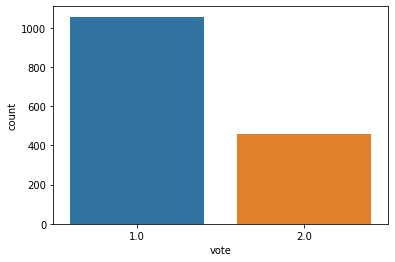

In [439]:
sns.countplot(Exit_Polls['vote'])

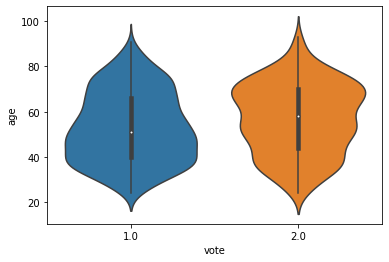

In [440]:
sns.violinplot(y=Exit_Polls['age'],x=Exit_Polls['vote'])

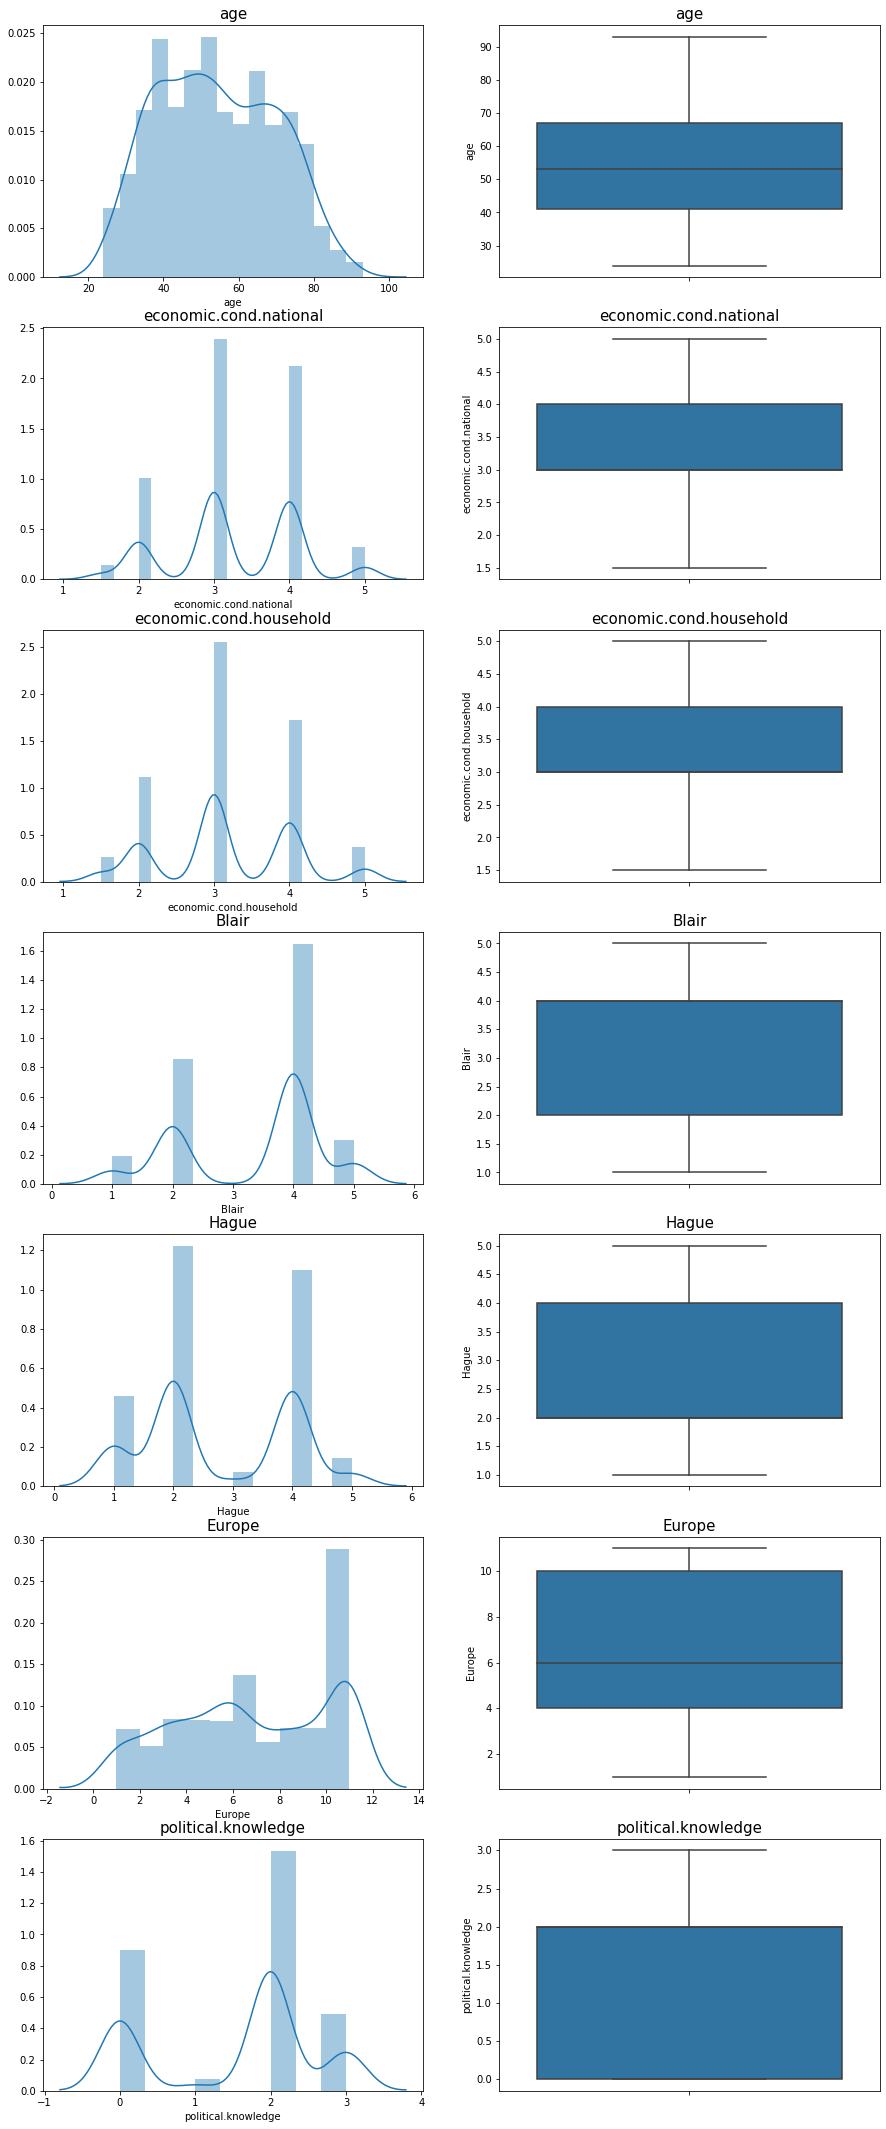

In [441]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15, 38)

a = sns.distplot(Exit_Polls['age'] , ax=axes[0][0])
a.set_title("age",fontsize=15)
a = sns.boxplot(Exit_Polls['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age",fontsize=15)

a = sns.distplot(Exit_Polls['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national",fontsize=15)
a = sns.boxplot(Exit_Polls['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national",fontsize=15)

a = sns.distplot(Exit_Polls['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household",fontsize=15)
a = sns.boxplot(Exit_Polls['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household",fontsize=15)


a = sns.distplot(Exit_Polls['Blair'] , ax=axes[3][0])
a.set_title("Blair",fontsize=15)
a = sns.boxplot(Exit_Polls['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair",fontsize=15)

a = sns.distplot(Exit_Polls['Hague'] , ax=axes[4][0])
a.set_title("Hague",fontsize=15)
a = sns.boxplot(Exit_Polls['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague",fontsize=15)

a = sns.distplot(Exit_Polls['Europe'] , ax=axes[5][0])
a.set_title("Europe",fontsize=15)
a = sns.boxplot(Exit_Polls['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe",fontsize=15)

a = sns.distplot(Exit_Polls['political.knowledge'] , ax=axes[6][0])
a.set_title("political.knowledge",fontsize=15)
a = sns.boxplot(Exit_Polls['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political.knowledge",fontsize=15)


plt.show()


#Outliers are present as histograms & Boxplots indicate 

# Bivariate Analysis

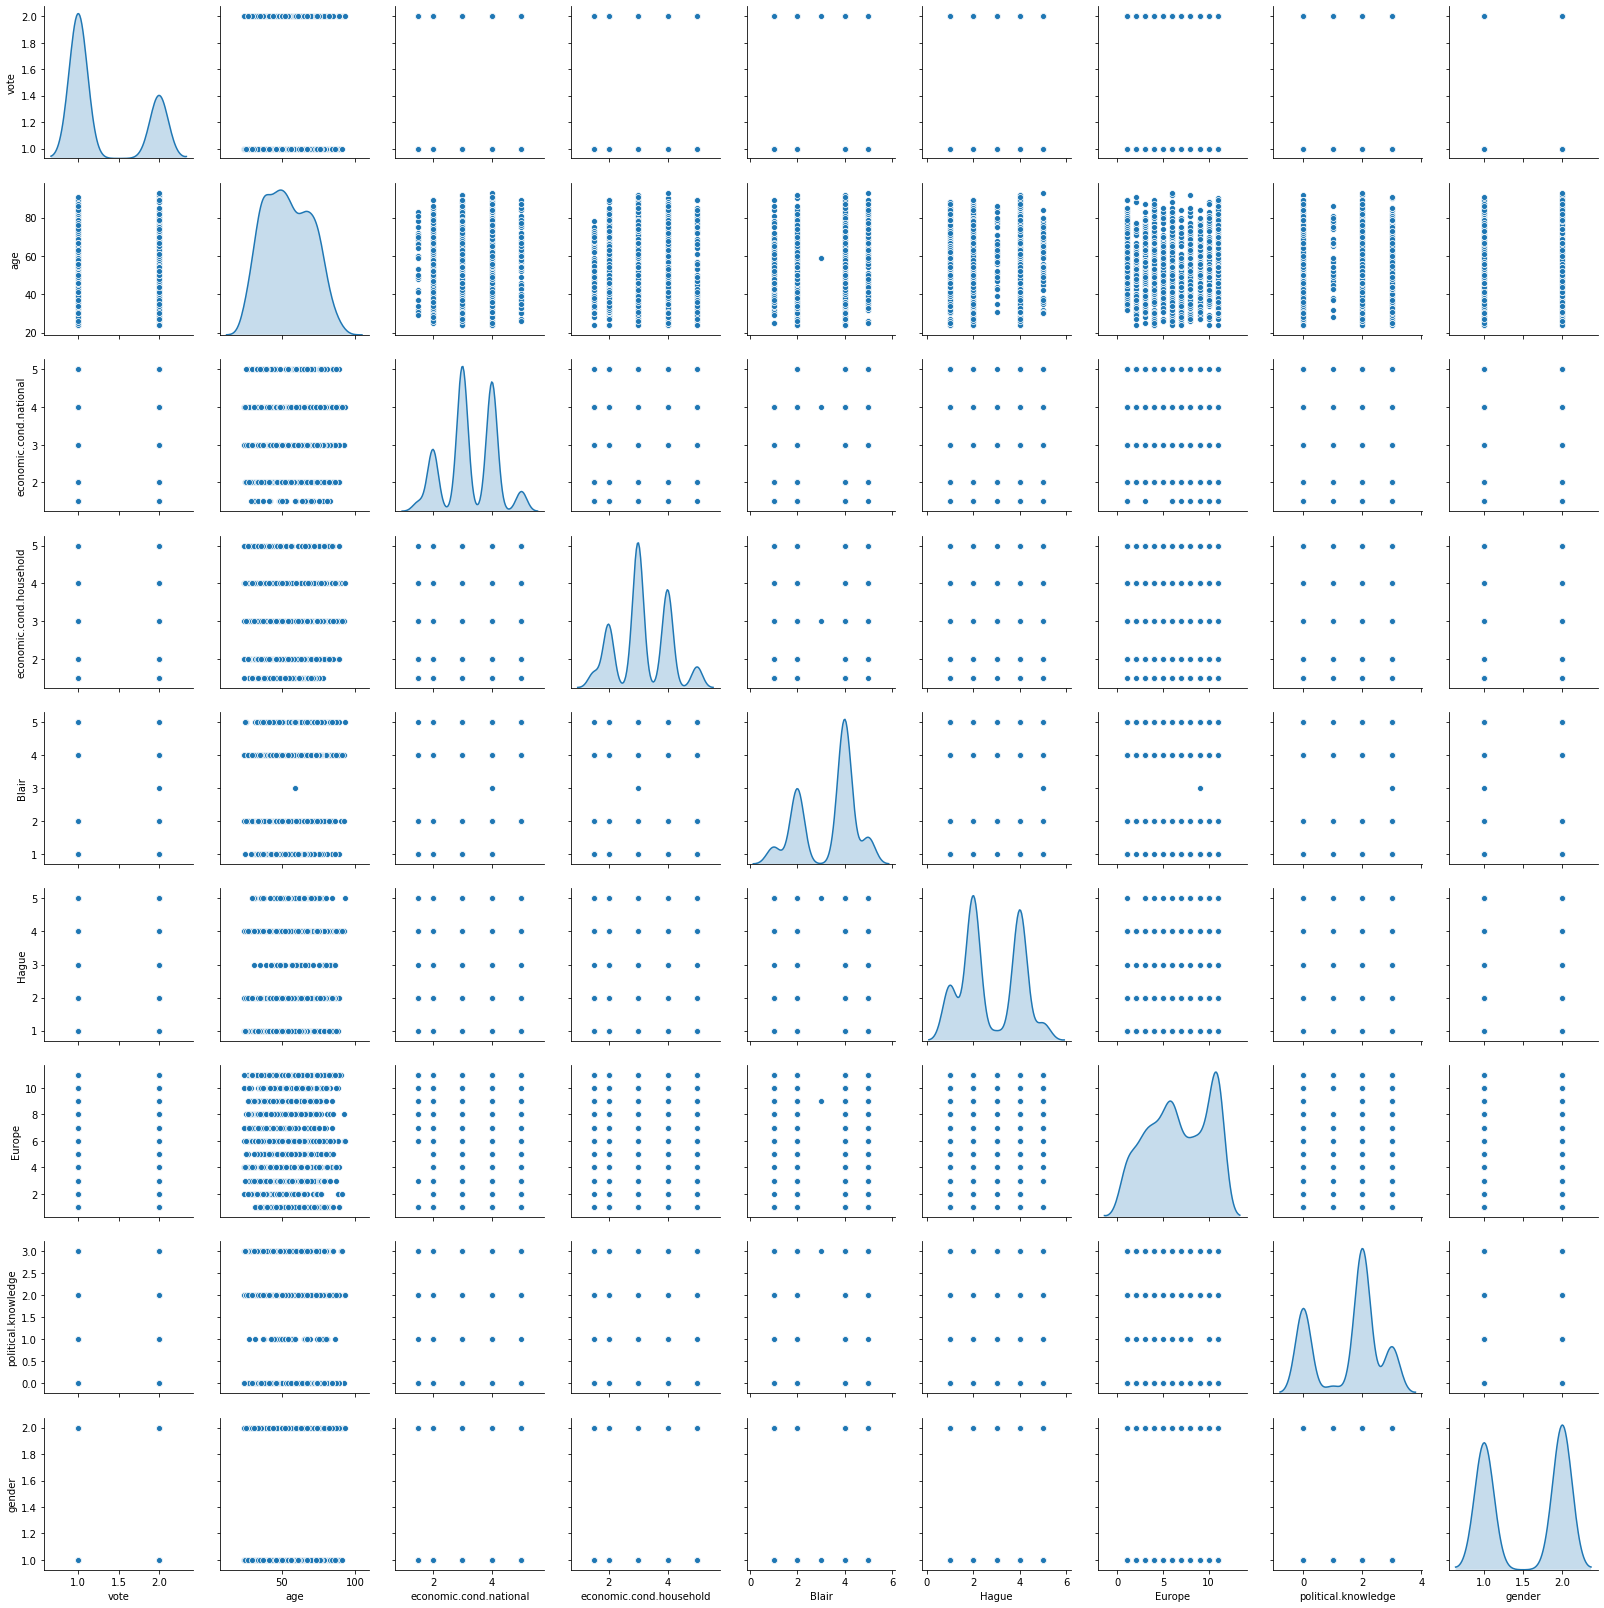

In [442]:
#Let us check for pair plots
sns.pairplot(Exit_Polls,diag_kind='kde')

In [443]:
# Check for correlation of variable
Exit_Polls.corr(method='pearson')

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,1.000000,0.109274,-0.304028,-0.176807,-0.426606,0.468186,0.384612,0.111589,0.034464
age,0.109274,1.000000,0.022283,-0.044403,0.032084,0.031144,0.064562,-0.046598,0.017933
economic.cond.national,-0.304028,0.022283,1.000000,0.344462,0.323603,-0.199175,-0.206605,-0.029273,-0.054950
economic.cond.household,-0.176807,-0.044403,0.344462,1.000000,0.216653,-0.099644,-0.112186,-0.040521,-0.033001
Blair,-0.426606,0.032084,0.323603,0.216653,1.000000,-0.243508,-0.295944,-0.021299,-0.067624
Hague,0.468186,0.031144,-0.199175,-0.099644,-0.243508,1.000000,0.285738,-0.029906,0.028309
Europe,0.384612,0.064562,-0.206605,-0.112186,-0.295944,0.285738,1.000000,-0.151197,0.076059
political.knowledge,0.111589,-0.046598,-0.029273,-0.040521,-0.021299,-0.029906,-0.151197,1.000000,-0.156923
gender,0.034464,0.017933,-0.054950,-0.033001,-0.067624,0.028309,0.076059,-0.156923,1.000000


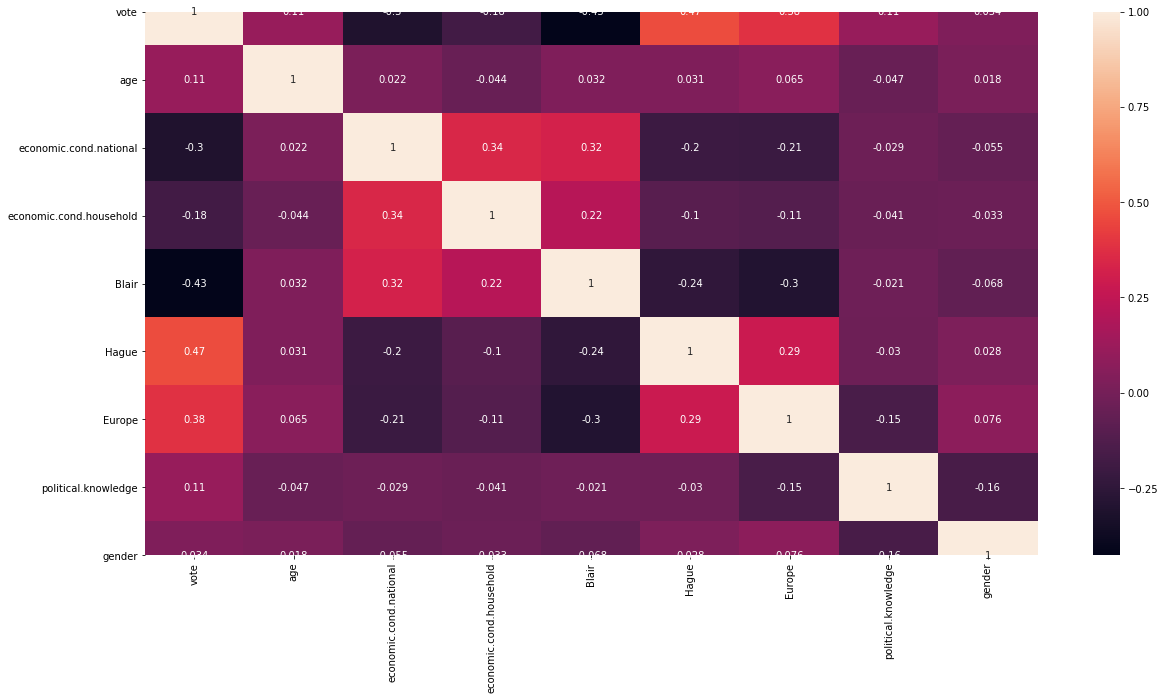

In [444]:
plt.subplots(figsize=(20,10))
sns.heatmap(Exit_Polls.corr(), annot=True)  # plot the correlation coefficients as a heatmap

# Applying Logistic Regression

In [445]:
x = Exit_Polls.drop(columns=['vote'])
y = Exit_Polls['vote']

In [446]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [447]:
from sklearn.preprocessing import StandardScaler

In [448]:
sc = StandardScaler()

In [449]:
x_train = sc.fit_transform(x_train)

In [450]:
x_test = sc.fit_transform(x_test)

In [451]:
from sklearn.linear_model import LogisticRegression

In [452]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)


LogisticRegression()

# Predicting on Train & Test Dataset

In [453]:
ytrain_predict = LR_model.predict(x_train)
ytest_predict = LR_model.predict(x_test)

# Getting the Predicted Classes & Probs

In [454]:
ytest_predict_prob=LR_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.631433,0.368567
1,0.872356,0.127644
2,0.993630,0.006370
3,0.201984,0.798016
4,0.939325,0.060675


# Model Evaluation - Train Dataset

In [455]:
# Accuracy - Training Data
LR_model.score(x_train, y_train)

0.8341187558906692

# AUC & ROC for Training Data

In [456]:
# predict probabilities
probs = LR_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve


AUC: 0.890


In [457]:
## Performance Matrix on train data set
y_train_predict = LR_model.predict(x_train)
LR_model_score = LR_model.score(x_train, y_train)
print(LR_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[688  66]
 [110 197]]
              precision    recall  f1-score   support

         1.0       0.86      0.91      0.89       754
         2.0       0.75      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [458]:
## Performance Matrix on test data set
y_test_predict = LR_model.predict(x_test)
LR_model_score = LR_model.score(x_test, y_test)
print(LR_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[274  29]
 [ 49 104]]
              precision    recall  f1-score   support

         1.0       0.85      0.90      0.88       303
         2.0       0.78      0.68      0.73       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [459]:
# AUC & ROC for Test Data

In [460]:
# predict probabilities
probs = LR_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)


AUC: 0.890


# Applying Linear Discriminant Analysis

In [461]:
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(x_train,y_train)
LDA_model

LinearDiscriminantAnalysis()

In [462]:
# Predict it- Train
y_predict = LDA_model.predict(x_train)
model_score = LDA_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_predict))


0.8341187558906692
[[685  69]
 [107 200]]


In [463]:
# Predict it
y_predict = LDA_model.predict(x_test)
model_score = LDA_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))


0.8333333333333334
[[274  29]
 [ 47 106]]


In [464]:
# predict probabilities
probs = LDA_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.890


In [465]:
model_score = LDA_model.score(x_train, y_train)
print(model_score)

0.8341187558906692


# Applying K Nearest Neighbours

In [466]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [467]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(x_train)
model_score = KNN_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8548539114043355
[[691  63]
 [ 91 216]]
              precision    recall  f1-score   support

         1.0       0.88      0.92      0.90       754
         2.0       0.77      0.70      0.74       307

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [468]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(x_test)
model_score = KNN_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[271  32]
 [ 49 104]]
              precision    recall  f1-score   support

         1.0       0.85      0.89      0.87       303
         2.0       0.76      0.68      0.72       153

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



In [469]:
# predict probabilities
probs = KNN_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.890


# Applying Naive Bayes

In [470]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [471]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [472]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(x_train)
model_score = NB_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[673  81]
 [ 95 212]]
              precision    recall  f1-score   support

         1.0       0.88      0.89      0.88       754
         2.0       0.72      0.69      0.71       307

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [473]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(x_test)
model_score = NB_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[268  35]
 [ 45 108]]
              precision    recall  f1-score   support

         1.0       0.86      0.88      0.87       303
         2.0       0.76      0.71      0.73       153

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [474]:
# predict probabilities
probs = NB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.890


# SVM

In [475]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1)
SVM_model.fit(x_train, y_train)

SVC(random_state=1)

In [476]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(x_train)
model_score = SVM_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8661639962299718
[[703  51]
 [ 91 216]]
              precision    recall  f1-score   support

         1.0       0.89      0.93      0.91       754
         2.0       0.81      0.70      0.75       307

    accuracy                           0.87      1061
   macro avg       0.85      0.82      0.83      1061
weighted avg       0.86      0.87      0.86      1061



In [477]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(x_test)
model_score = SVM_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[280  23]
 [ 55  98]]
              precision    recall  f1-score   support

         1.0       0.84      0.92      0.88       303
         2.0       0.81      0.64      0.72       153

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.83      0.83      0.82       456



In [ ]:
probs = SVM_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(x_train, y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(x_train)
model_score = XGB_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(x_test)
model_score = XGB_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
probs = XGB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1)
Bagging_model.fit(x_train, y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(x_train)
model_score =Bagging_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(x_test)
model_score = Bagging_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
probs = Bagging_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# Applying SMOTE technique on all  models & re-running

# SMOTE

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=1)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

In [ ]:
## Let's check the shape after SMOTE
x_train_res.shape
y_train_res.shape


# Naive Bayes with SMOTE

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(x_train_res, y_train_res)

In [ ]:
## Performance Matrix on train data set with SMOTE - SMOTE is applied only train dataset
y_train_predict = NB_SM_model.predict(x_train_res)
model_score = NB_SM_model.score(x_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(x_test)
model_score = NB_SM_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
probs = NB_SM_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# Logistic Regression with SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR_SM_model = LogisticRegression()
LR_SM_model.fit(x_train_res, y_train_res)


In [ ]:
## Performance Matrix on train data set with SMOTE
y_train_predict = LR_SM_model.predict(x_train_res)
model_score = LR_SM_model.score(x_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = LR_SM_model.predict(x_test)
model_score = LR_SM_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


In [ ]:
probs = LR_SM_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# LDA with SMOTE

In [ ]:
clf = LinearDiscriminantAnalysis()
LDA_SM_model=clf.fit(x_train_res,y_train_res)
LDA_SM_model

In [ ]:
y_predict = LDA_SM_model.predict(x_test)
model_score = LDA_SM_model.score(x_test, y_test)
print(model_score)


In [ ]:
## Performance Matrix on train data set with SMOTE
y_train_predict = LDA_SM_model.predict(x_train_res)
model_score = LDA_SM_model.score(x_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

In [ ]:
probs = LDA_SM_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# KNN with Smote

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(x_train_res,y_train_res)

In [ ]:
y_train_predict = KNN_SM_model.predict(x_train_res)
model_score = KNN_SM_model.score(x_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(x_test)
model_score = KNN_SM_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
probs = KNN_SM_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# SVM with SMOTE

In [ ]:
from sklearn import svm

SVM_SM_model= svm.SVC(random_state=1)
SVM_SM_model.fit(x_train_res, y_train_res)

In [ ]:
## Performance Matrix on train data set
y_train_predict = SVM_SM_model.predict(x_train_res)
model_score = SVM_SM_model.score(x_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))


In [ ]:
## Performance Matrix on test data set
y_test_predict = SVM_SM_model.predict(x_test)
model_score = SVM_SM_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
probs = SVM_SM_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# ADA Boost with SMOTE

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADB_SM_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_SM_model.fit(x_train_res,y_train_res)

In [ ]:
## Performance Matrix on train data set
y_train_predict = ADB_SM_model.predict(x_train_res)
model_score = ADB_SM_model.score(x_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = ADB_SM_model.predict(x_test)
model_score = ADB_SM_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
probs = ADB_SM_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# XGBoost Boost with SMOTE

In [ ]:
import xgboost as xgb
XGB_SM_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_SM_model.fit(x_train_res, y_train_res)

In [ ]:
## Performance Matrix on train data set
y_train_predict = XGB_SM_model.predict(x_train_res)
model_score = XGB_SM_model.score(x_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(x_test)
model_score = XGB_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
probs = XGB_SM_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# Bagging with SMOTE

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
Bagging_SM_model=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1)
Bagging_SM_model.fit(x_train_res, y_train_res)

In [ ]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(x_train_res)
model_score =Bagging_model.score(x_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(x_test)
model_score = Bagging_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
probs = Bagging_SM_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)